# PCA 2 (Core)

## Visualización de Datos con Componentes Principales

### Descripción:

En esta actividad, utilizarás el **Análisis de Componentes Principales (PCA)** para visualizar datos en un espacio de menor dimensionalidad. Trabajarás con el famoso dataset **«Iris»** para reducir sus características a dos componentes principales y visualizar cómo se distribuyen las diferentes clases en este nuevo espacio de características.

Enlace al dataset: [Iris Dataset](https://www.kaggle.com/uciml/iris)

### Objetivo:

El objetivo es reducir la dimensionalidad del dataset «Iris» mediante PCA, visualizando las clases en el nuevo espacio bidimensional y evaluando si los componentes principales son capaces de capturar adecuadamente la variabilidad de los datos.

### Instrucciones:

#### 1. Carga de datos:
- Descarga el dataset «Iris» de Kaggle.
- Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
- Asegúrate de que los datos no contengan valores nulos o atípicos.

#### 2. Exploración y preprocesamiento de datos:
- Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
- Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

#### 3. Aplicación de PCA:
- Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
- Calcula la **«explained variance»** para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

#### 4. Visualización de los componentes principales:
- Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
- Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

#### 5. Interpretación de los resultados:
- Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.
- Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

### Análisis de Resultados:

- Compara la distribución de las clases en el espacio bidimensional con la distribución original de las variables. ¿Qué tan bien puede PCA capturar las relaciones entre las clases en este caso?
- Realiza un reporte que incluya el gráfico de los componentes principales y discute la utilidad de PCA para la visualización de datos en problemas de clasificación.

### Conclusión:

Esta actividad se centra en la visualización de datos utilizando PCA. La reducción de dimensionalidad mediante PCA no solo ayuda a visualizar los datos en un espacio más pequeño, sino que también permite identificar las relaciones entre las variables y las clases.


In [138]:
#Importar Librerias Necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [139]:
# Carga de datos
iris = load_iris()
# Crear un DataFrame con los datos
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [140]:
# Carga de datos
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target
# Crear un DataFrame con los datos
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target


In [141]:
# Renombrar columnas del dataset
df.columns = (
    df.columns
    .str.strip()               # Elimina espacios iniciales y finales
    .str.replace("'", "")      # Elimina comillas simples
    .str.replace("-", "_")     # Reemplaza guiones por guiones bajos
    .str.replace(" ", "_")     # Reemplaza espacios por guiones bajos
    .str.lower()               # Convierte todo a minúsculas
)

# Mostrar nombres de las columnas normalizados
print(df.columns)

Index(['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)',
       'petal_width_(cm)', 'species'],
      dtype='object')


In [142]:
# Renombrar las columnas para simplificar los nombres
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [143]:
# Exploración inicial del dataset
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [144]:
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [145]:
# Exploración y preprocesamiento de datos
# Verificar valores nulos
print("\nValores nulos por columna:")

qsna = df.shape[0] - df.isnull().sum(axis=0)
qna = df.isnull().sum(axis=0)
ppna = np.round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)
aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
na = pd.DataFrame(data=aux)
na.sort_values(by='Na en %', ascending=False)



Valores nulos por columna:


,datos sin NAs en q,Na en q,Na en %
sepal_length,150,0,0.0
sepal_width,150,0,0.0
petal_length,150,0,0.0
petal_width,150,0,0.0
species,150,0,0.0


In [146]:
# Normalizar los datos (sin incluir la columna de clase)
scaler = StandardScaler()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X_scaled = scaler.fit_transform(df[features])

# Mostrar un resumen de los datos escalados
print("Resumen de datos escalados:")
print(f"Media por característica (aproximadamente 0): {X_scaled.mean(axis=0)[:5]}")
print(f"Desviación estándar por característica (aproximadamente 1): {X_scaled.std(axis=0)[:5]}")

Resumen de datos escalados:
Media por característica (aproximadamente 0): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Desviación estándar por característica (aproximadamente 1): [1. 1. 1. 1.]


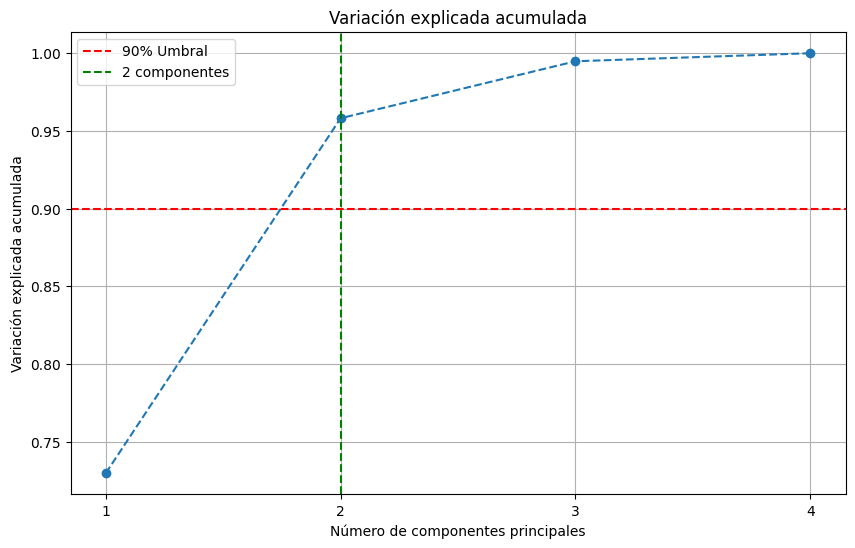

Varianza explicada por el primer componente: 72.96%
Varianza explicada por el segundo componente: 22.85%
Varianza total explicada por los dos primeros componentes: 95.81%


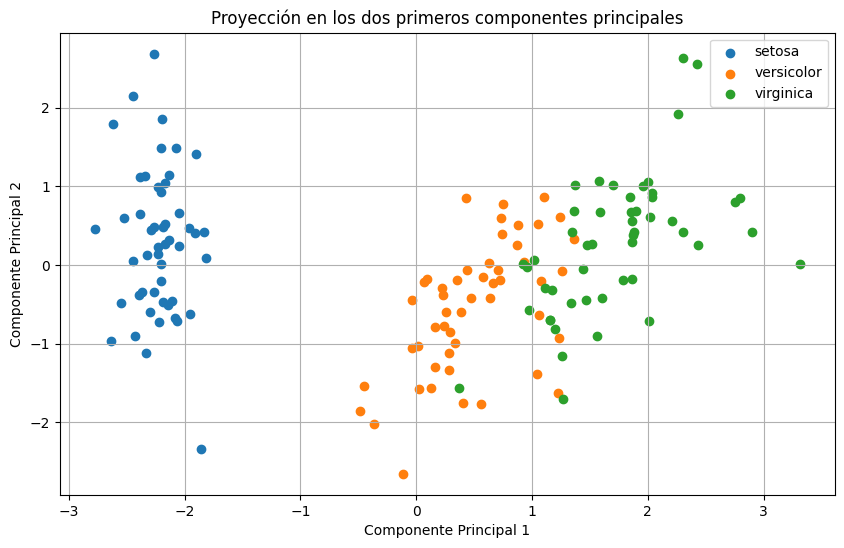

In [147]:
# Aplicar PCA (para calcular la variación explicada acumulada)
pca_full = PCA()
pca_full.fit(X_scaled)

# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks(range(1, len(explained_variance_cumulative) + 1, 1))  # Mostrar cada componente
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

# Reducir a dos componentes principales
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(X_scaled)

# Calcular la varianza explicada por los componentes principales
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Varianza explicada por el primer componente: {explained_variance_ratio[0]*100:.2f}%")
print(f"Varianza explicada por el segundo componente: {explained_variance_ratio[1]*100:.2f}%")
print(f"Varianza total explicada por los dos primeros componentes: {sum(explained_variance_ratio)*100:.2f}%")

# Visualizar los datos proyectados
plt.figure(figsize=(10, 6))

# Obtener nombres de clases
target_names = iris.target_names
for class_value, class_label in enumerate(target_names):
    plt.scatter(
        iris_pca[y == class_value, 0],
        iris_pca[y == class_value, 1],
        label=class_label
    )

plt.title('Proyección en los dos primeros componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid()
plt.show()


### Análisis de Resultados del PCA

#### 1. **Varianza explicada por componente**
- **Primer componente principal (PC1)**: Explica **72.96%** de la variabilidad de los datos originales. Esto significa que la mayor parte de la información relevante de los datos está contenida en esta dimensión.
- **Segundo componente principal (PC2)**: Explica **22.85%** de la variabilidad adicional, complementando a PC1.
- **Varianza total explicada por los dos primeros componentes**: **95.81%**, lo que implica que estos dos componentes capturan casi toda la información de los datos (muy poca información se pierde al reducir las dimensiones a dos).

#### 2. **Gráfica de proyección**
- La visualización en los dos primeros componentes principales muestra una buena separación entre las tres clases de Iris:
  - **Setosa (azul)**: Se encuentra claramente separada de las otras dos clases, indicando que sus características son bastante distintas.
  - **Versicolor (naranja)** y **Virginica (verde)**: Aunque tienen cierta superposición, la separación sigue siendo notable, especialmente considerando que solo se usan dos dimensiones.

#### 3. **Interpretación general**
- La reducción de dimensionalidad con PCA ha sido efectiva para este conjunto de datos. Los dos primeros componentes principales capturan casi toda la variabilidad (95.81%), lo que permite analizar y visualizar los datos en dos dimensiones sin perder demasiada información.
- La separación de las clases en el espacio reducido indica que las características originales del dataset proporcionan una buena discriminación entre especies.

#### 4. **Conclusión**
La aplicación de PCA demuestra que:
- **Setosa** es fácilmente distinguible de las otras dos clases.
- Aunque hay cierta superposición entre **Versicolor** y **Virginica**, el modelo todavía puede lograr una buena separación, considerando el 95.81% de la varianza explicada.


In [148]:
# Interpretación de los resultados
# Coeficientes de los componentes principales
print("\nCoeficientes de los dos primeros componentes principales:")
for i, component in enumerate(pca.components_[:2], start=1):
    print(f"Componente Principal {i}:")
    for feature, coef in zip(features, component):
        print(f"  {feature}: {coef:.4f}")



Coeficientes de los dos primeros componentes principales:
Componente Principal 1:
  sepal_length: 0.5211
  sepal_width: -0.2693
  petal_length: 0.5804
  petal_width: 0.5649
Componente Principal 2:
  sepal_length: 0.3774
  sepal_width: 0.9233
  petal_length: 0.0245
  petal_width: 0.0669
